In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt
%matplotlib inline 
from keras.utils import np_utils

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Importing and normalizing data using pandas
data = pd.read_csv('mnist_train.csv', header = None) # Takes approximately 7-9 seconds in loading
data_norm = data/255 # Normalizing the data
test_data = pd.read_csv('mnist_test.csv', header = None)
test_data_norm = test_data/255

In [4]:
# Segregating the data
train_X = data_norm.drop(0, axis = 1).T # Getting all the images in a single variable
# train_X = tf.reshape([-1, 28, 28, 1])
tf.reshape?
train_Y = data[0].values.reshape(60000, 1) # Getting labels 

test_X = test_data_norm.drop(0, axis = 1).T # Getting all the test images in a single variable 
test_Y = test_data[0].values.reshape(10000, 1) # Getting labels
train_Y = np_utils.to_categorical(train_Y, 10)
test_Y = np_utils.to_categorical(test_Y, 10)

In [22]:
# Testing the shape of the data
print('Number of training examples', train_X.shape[1])
print('Number of test examples', test_X.shape[1])
print('Shape of trianing set is', train_X.shape)
print('Shape of training labels is', train_Y.shape)
print('Shape of test set is', test_X.shape)
print('Shape of test labels is', test_Y.shape)

Number of training examples 60000
Number of test examples 10000
Shape of trianing set is (784, 60000)
Shape of training labels is (60000, 1)
Shape of test set is (784, 10000)
Shape of test labels is (10000, 1)


The label for this image is [8]


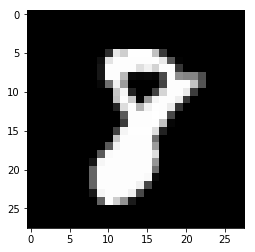

In [23]:
# Visualizing the data
image_num = 19000
a = train_X[image_num].values.reshape(28,28)
label = train_Y[image_num]
print('The label for this image is', label)
plt.imshow(a, cmap = 'gray')

In [25]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    x = tf.placeholder(tf.float32, shape = (None, n_H0, n_W0, n_C0))
    y = tf.placeholder(tf.float32, shape = (None, n_y))
    return x,y

In [29]:
def initialize_parameters():
    W1 = tf.get_variable('W1', [4, 4, 3, 8], initializer=tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable('W2', [2, 2, 8, 16], initializer=tf.contrib.layers.xavier_initializer(seed = 0))
    parameters = {'W1' : W1,
                  'W2' : W2}
    return parameters

In [36]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    W2 = parameters['W2']
    
    Z1 = tf.nn.conv2d(X, W1, strides = [1, 1, 1, 1], padding = 'SAME')
    A1 = tf.nn.relu(Z1)
    P1 = tf.nn.max_pool(A1, ksize = [1, 8, 8, 1], strides = [1, 8, 8, 1], padding = 'SAME')
    Z2 = tf.nn.conv2d(P1, W2, strides = [1, 1, 1, 1], padding = 'SAME')
    A2 = tf.nn.relu(Z2)
    P2 = tf.nn.max_pool(A2, ksize = [1, 4, 4, 1], strides = [1, 4, 4, 1], padding = 'SAME')
    P = tf.contrib.layers.flatten(P2)
    Z3 = tf.contrib.layers.fully_connected(P, 6, activation_fn = None)
    
    return Z3

In [45]:
def compute_cost(Z3, Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3, labels = Y))
    return cost

In [57]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.009, num_epoches = 100, minibatch_size = 64, print_cost = True):
    ops.reset_default_graph()
    seed = 3
    (m, n_H, n_W0, n_C0) = X_train.shape
    n_y = Y_train.shape[1]
    costs = []
    
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    parameters = initialize_parameters()
    
    Z3 = forward_propagation(X, parameters)
    
    cost = compute_cost(Z3, Y)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sees:
        sess.run(init)
        for epoch in range(num_epoches):
            minibatch_cost = 0
            num_minibatches = int(m/minibatch_size)
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _, temp_cost = sess.run([optimizer, cost], feed_dict={X:minibatch_X, Y: minibatch_Y})
                minibatch_cost += temp_cost/num_minibatches
            if print_cost == True and epoch % 5 == 0:
                print('Cost after epoch %i : %f'%(epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
    plt.plot(np.squeeze(costs))
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per tens)')
    plt.title('Learning rate = ', str(learning_rate))
    plt.show()
    
    predict_op = tf.argmax(Z3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
    
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
    print(accuracy)
    train_accuracy = accuracy.eval({X: X_train, Y:Y_train})
    test_accuracy = accuracy.eval({X : X_test, Y : Y_test})
    print('Train Accuracy:', train_accuracy)
    print('Test Accuracy:', test_accuracy)
    
    return train_accuracy, test_accuracy, parameters

In [58]:
_, _, parameters = model(train_X, train_Y, test_X, test_Y)

ValueError: not enough values to unpack (expected 4, got 2)

## Tensorflow website tutorial

In [8]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.INFO)

def cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2 and Pooling Layer #2
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Dense Layer
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits Layer
  logits = tf.layers.dense(inputs=dropout, units=10)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }

  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


if __name__ == "__main__":
    tf.app.run()

AttributeError: module '__main__' has no attribute 'main'